In [1]:
import random
import matplotlib.pyplot as plt
import time



import sys
from pathlib import Path

# Add the parent directory to sys.path to allow for importing the `timing` module
parent_dir = str(Path.cwd().parent)
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

from timing.timeComp import quadratic


# Insertion sort
<video controls src="../media/2024-04-01 14-04-38.mp4" width="800">
    Your browser does not support the video tag.
</video>

In [2]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >=0 and key < arr[j] :
                arr[j + 1] = arr[j]
                j -= 1
        arr[j + 1] = key


In [3]:
arr = [12, 11, 13, 5, 6]
insertion_sort(arr)
print("Sorted array is:", arr)


Sorted array is: [5, 6, 11, 12, 13]


- At jth step, all the elements before j are sorted, when jth step is finished, sorted list of size j+1 is created.
#### Time complexity 
**Worst**: O($n^2$) - one comparsion on first step, two on second, ..., 1+2+...+(n-1)=$\frac{n(n-1)}{2}$, reversed sorted list

**Best**: O(n) - one comparsion for first, ..., one for (n-1)th, total = n-1

#### Counting steps


In [4]:
def count_operations(func):
    def wrapper(*args, **kwargs):
        wrapper.operations = 0  # Reset the counter each time the function is called
        result = func(wrapper, *args, **kwargs)  # Pass the wrapper as an argument to func
        print(f"Total operations: {wrapper.operations}")
        return result
    return wrapper

@count_operations
def insertion_sort(counter, arr):
    for i in range(1, len(arr)):
        key = arr[i]
        counter.operations += 1  # For the assignment of key
        j = i - 1
        counter.operations += 2  # For the assignment of j and subtraction

        # Each iteration of this loop is a comparison
        while j >= 0:
            counter.operations += 1  # For the comparison j >= 0
            if arr[j] > key:
                counter.operations += 1  # For the comparison arr[j] > key
                arr[j + 1] = arr[j]
                counter.operations += 1  # For the assignment inside the loop
                j -= 1
                counter.operations += 1  # For the decrement of j
            else:
                # If we exit the while loop because arr[j] <= key, 
                # we've done one more comparison
                counter.operations += 1
                break

        arr[j + 1] = key
        counter.operations += 1  # For the final assignment when the correct position is found



In [5]:
def count_operations(func):
    def wrapper(*args, **kwargs):
        wrapper.operations = 0  # Reset the counter each time the function is called
        result = func(wrapper, *args, **kwargs)  # Pass the wrapper as an argument to func
        operations = wrapper.operations  # Store the operations before the function ends
        return result, operations
    return wrapper

# The decorated insertion sort algorithm which counts basic operations
@count_operations
def insertion_sort(counter, arr):
    for i in range(1, len(arr)):
        key = arr[i]
        counter.operations += 1  # For the assignment of key
        j = i - 1
        counter.operations += 2  # For the assignment of j and the subtraction

        while j >= 0:
            counter.operations += 1  # For the comparison j >= 0
            if arr[j] > key:
                counter.operations += 1  # For the comparison arr[j] > key
                arr[j + 1] = arr[j]
                counter.operations += 1  # For the assignment inside the loop
                j -= 1
                counter.operations += 1  # For the decrement of j
            else:
                counter.operations += 1  # For the failed comparison arr[j] <= key
                break

        arr[j + 1] = key
        counter.operations += 1  # For the assignment when the correct position is found

# Generating arrays of every size from 1 to n, filled with random numbers
n = int(input("Input the range of n"))  # You can adjust the value of n as needed
array_sizes = []
operation_counts = []
squared_counts = []

for size in range(1, n + 1):
    random_array = [random.randint(0, 1000) for _ in range(size)]
    sorted_array, operations = insertion_sort(random_array)
    array_sizes.append(size)
    operation_counts.append(operations)
    squared_counts.append(size ** 2)

# Plotting the results using matplotlib
plt.figure(figsize=(10, 5))
plt.plot(array_sizes, operation_counts, label='Insertion Sort Basic Operations', marker='o')
plt.plot(array_sizes, squared_counts, label='n^2', linestyle='--')
plt.xlabel('Array Size (n)')
plt.ylabel('Number of Basic Operations')
plt.title('Basic Operations in Insertion Sort vs. n^2')
plt.legend()
plt.grid(True)
plt.show()

ValueError: invalid literal for int() with base 10: ''

#### Counting time


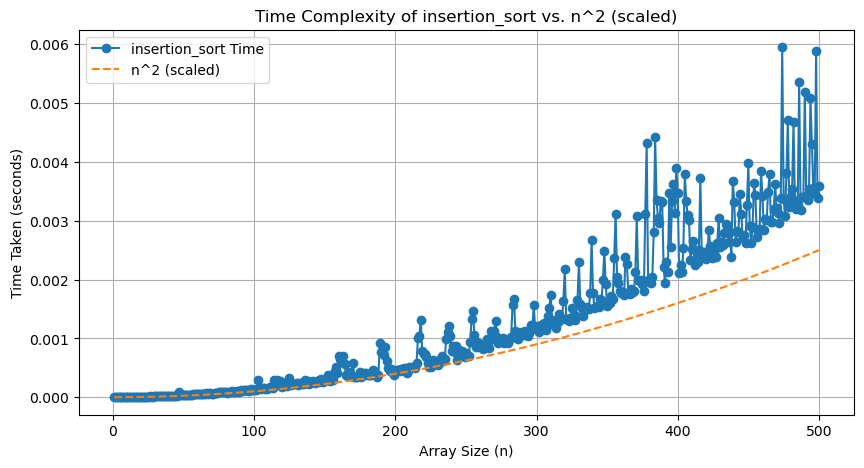

TypeError: insertion_sort() missing 1 required positional argument: 'arr'

In [ ]:
@quadratic(n=int(input("Input the range of n: ")))
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr


insertion_sort()